# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010â€“2016)

## Problem Statement

Accurately estimating greenhouse gas (GHG) emissions across supply chains is essential for effective climate change mitigation and sustainable industrial practices. Existing datasets provide annual emission factors for various U.S. industries and commodities from 2010 to 2016, along with descriptive attributes and data quality indicators such as reliability, substance, unit, and correlations (temporal, geographical, technological, and data collection methods). However, predicting emission factors based on these parameters remains a challenge due to their complex interdependencies. This project aims to develop a regression model that can predict supply chain emission factors with margins using these features, enabling better decision-making for sustainability assessments.

## Data Loading and Preprocessing

### Data Import

In [1]:
import pandas as pd  
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx' 
years = range(2010, 2017)

In [2]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

Commodity Code                                     Commodity Name  \
0         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
1         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
2         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
3         1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
4         1111B0          Fresh wheat, corn, rice, and other grains   

        Substance                               Unit  \
0  carbon dioxide       kg/2018 USD, purchaser price   
1         methane       kg/2018 USD, purchaser price   
2   nitrous oxide       kg/2018 USD, purchaser price   
3      other GHGs  kg CO2e/2018 USD, purchaser price   
4  carbon dioxide       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.398   
1                                          0.001   
2                                          0.002   
3                                          0.002   
4                                          0.659   

   Margins of Supply Chain Emission Factors  \
0                                     0.073   
1                                     0.001   
2                                     0.000   
3                                     0.000   
4                                     0.081   

   Supply Chain Emission Factors with Margins  Unnamed: 7  \
0                                       0.470         NaN   
1                                       0.002         NaN   
2                                       0.002         NaN   
3                                       0.002         NaN   
4                                       0.740         NaN   

   DQ ReliabilityScore of Factors without Margins  \
0                                               4   
1                                               4   
2                                               4   
3                                               3   
4                                               4   

   DQ TemporalCorrelation of Factors without Margins  \
0                                                  3   
1                                                  3   
2                                                  3   
3                                                  3   
4                                                  3   

   DQ GeographicalCorrelation of Factors without Margins  \
0                                                  1       
1                                                  1       
2                                                  1       
3                                                  1       
4                                                  1       

   DQ TechnologicalCorrelation of Factors without Margins  \
0                                                  4        
1                                                  1        
2                                                  4        
3                                                  3        
4                                                  4        

   DQ DataCollection of Factors without Margins  
0                                             1  
1                                             1  
2                                             1  
3                                             1  
4                                             1

In [3]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

Industry Code    Industry Name       Substance  \
0        1111A0  Oilseed farming  carbon dioxide   
1        1111A0  Oilseed farming         methane   
2        1111A0  Oilseed farming   nitrous oxide   
3        1111A0  Oilseed farming      other GHGs   
4        1111B0    Grain farming  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.414   
1                                          0.001   
2                                          0.002   
3                                          0.002   
4                                          0.680   

   Margins of Supply Chain Emission Factors  \
0                                     0.073   
1                                     0.001   
2                                     0.000   
3                                     0.000   
4                                     0.082   

   Supply Chain Emission Factors with Margins  Unnamed: 7  \
0                                       0.487         NaN   
1                                       0.002         NaN   
2                                       0.002         NaN   
3                                       0.002         NaN   
4                                       0.762         NaN   

   DQ ReliabilityScore of Factors without Margins  \
0                                               4   
1                                               4   
2                                               4   
3                                               3   
4                                               4   

   DQ TemporalCorrelation of Factors without Margins  \
0                                                  3   
1                                                  3   
2                                                  3   
3                                                  3   
4                                                  3   

   DQ GeographicalCorrelation of Factors without Margins  \
0                                                  1       
1                                                  1       
2                                                  1       
3                                                  1       
4                                                  1       

   DQ TechnologicalCorrelation of Factors without Margins  \
0                                                  4        
1                                                  1        
2                                                  4        
3                                                  3        
4                                                  4        

   DQ DataCollection of Factors without Margins  
0                                             1  
1                                             1  
2                                             1  
3                                             1  
4                                             1

### Meta Data Addition, Column Cleanup and Merging

In [4]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

df = pd.concat(all_data, ignore_index=True)
df.head()

Code                                               Name       Substance  \
0  1111A0  Fresh soybeans, canola, flaxseeds, and other o...  carbon dioxide   
1  1111A0  Fresh soybeans, canola, flaxseeds, and other o...         methane   
2  1111A0  Fresh soybeans, canola, flaxseeds, and other o...   nitrous oxide   
3  1111A0  Fresh soybeans, canola, flaxseeds, and other o...      other GHGs   
4  1111B0          Fresh wheat, corn, rice, and other grains  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.398   
1                                          0.001   
2                                          0.002   
3                                          0.002   
4                                          0.659   

  Margins of Supply Chain Emission Factors  \
0                                    0.073   
1                                    0.001   
2                                      0.0   
3                                      0.0   
4                                    0.081   

   Supply Chain Emission Factors with Margins  Unnamed: 7  \
0                                       0.470         NaN   
1                                       0.002         NaN   
2                                       0.002         NaN   
3                                       0.002         NaN   
4                                       0.740         NaN   

   DQ ReliabilityScore of Factors without Margins  \
0                                               4   
1                                               4   
2                                               4   
3                                               3   
4                                               4   

   DQ TemporalCorrelation of Factors without Margins  \
0                                                  3   
1                                                  3   
2                                                  3   
3                                                  3   
4                                                  3   

   DQ GeographicalCorrelation of Factors without Margins  \
0                                                  1       
1                                                  1       
2                                                  1       
3                                                  1       
4                                                  1       

   DQ TechnologicalCorrelation of Factors without Margins  \
0                                                  4        
1                                                  1        
2                                                  4        
3                                                  3        
4                                                  4        

   DQ DataCollection of Factors without Margins     Source  Year  
0                                             1  Commodity  2010  
1                                             1  Commodity  2010  
2                                             1  Commodity  2010  
3                                             1  Commodity  2010  
4                                             1  Commodity  2010

## Data Cleaning

In [5]:
print(df.isnull().sum())

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64


In [6]:
df.drop(columns=['Unnamed: 7'],inplace=True)

In [7]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [9]:
df.drop(columns=['Name','Code','Year'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  object 
 1   Unit                                                    22092 non-null  object 
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  object 
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

## Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Distribution of Emission Factor')
plt.xlabel('Emission Factor')
plt.ylabel('Count')
plt.show()

In [12]:
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [13]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [14]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [15]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

## Feature encoding

In [16]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [17]:
df['Substance']=df['Substance'].map(substance_map)

In [18]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [19]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [20]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [21]:
df['Unit']=df['Unit'].map(unit_map)

In [22]:
print(df['Unit'].unique())

[0 1]


In [23]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [24]:
source_map={'Commodity':0, 'Industry':1}

In [25]:
df['Source']=df['Source'].map(source_map)

In [26]:
print(df['Source'].unique())

[0 1]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  object 
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

In [28]:
df.describe()

Substance          Unit  \
count  22092.000000  22092.000000   
mean       1.500000      0.250000   
std        1.118059      0.433023   
min        0.000000      0.000000   
25%        0.750000      0.000000   
50%        1.500000      0.000000   
75%        2.250000      0.250000   
max        3.000000      1.000000   

       Supply Chain Emission Factors without Margins  \
count                                   22092.000000   
mean                                        0.084807   
std                                         0.267039   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.002000   
75%                                         0.044000   
max                                         7.228000   

       Supply Chain Emission Factors with Margins  \
count                                22092.000000   
mean                                     0.097681   
std                                      0.288992   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.003000   
75%                                      0.052000   
max                                      7.290000   

       DQ ReliabilityScore of Factors without Margins  \
count                                    22092.000000   
mean                                         3.308030   
std                                          0.499643   
min                                          2.000000   
25%                                          3.000000   
50%                                          3.000000   
75%                                          4.000000   
max                                          4.000000   

       DQ TemporalCorrelation of Factors without Margins  \
count                                       22092.000000   
mean                                            2.571429   
std                                             0.494883   
min                                             2.000000   
25%                                             2.000000   
50%                                             3.000000   
75%                                             3.000000   
max                                             3.000000   

       DQ GeographicalCorrelation of Factors without Margins  \
count                                            22092.0       
mean                                                 1.0       
std                                                  0.0       
min                                                  1.0       
25%                                                  1.0       
50%                                                  1.0       
75%                                                  1.0       
max                                                  1.0       

       DQ TechnologicalCorrelation of Factors without Margins  \
count                                       22092.000000        
mean                                            2.632129        
std                                             1.135661        
min                                             1.000000        
25%                                             1.000000        
50%                                             3.000000        
75%                                             3.000000        
max                                             5.000000        

       DQ DataCollection of Factors without Margins        Source  
count                                       22092.0  22092.000000  
mean                                            1.0      0.500634  
std                                             0.0      0.500011  
min                                             1.0      0.000000  
25%                                             1.0      0.000000  
50%                                             1.0      1.000000  

## Visualization after feature encoding

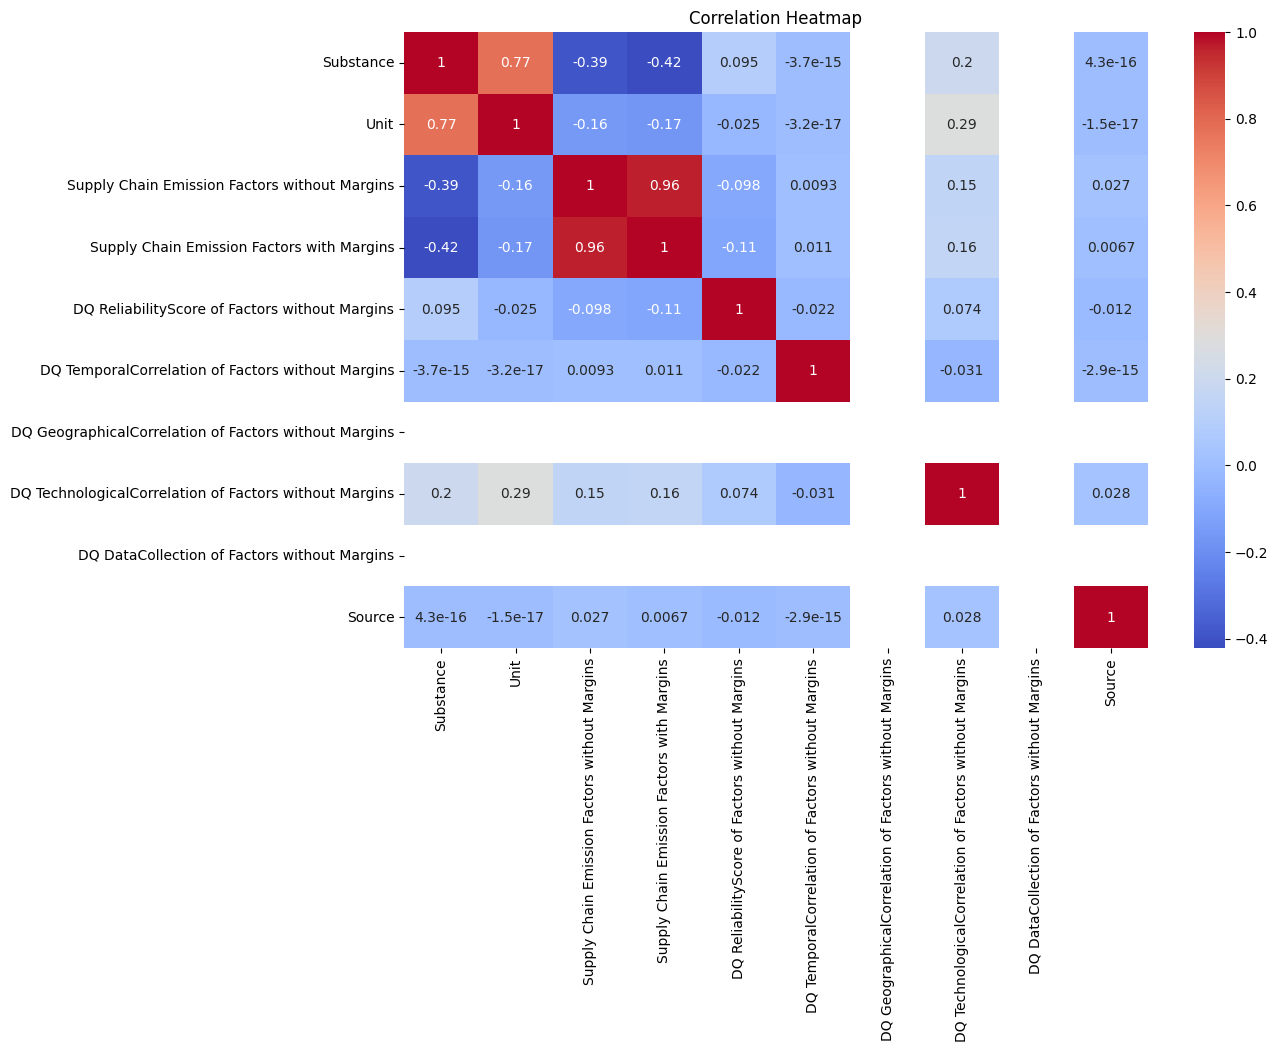

In [29]:
# Correlation matrix
import numpy as np
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

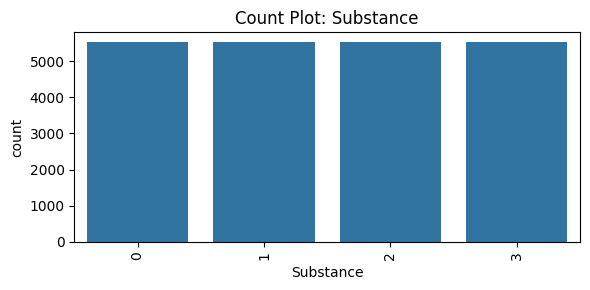

In [30]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

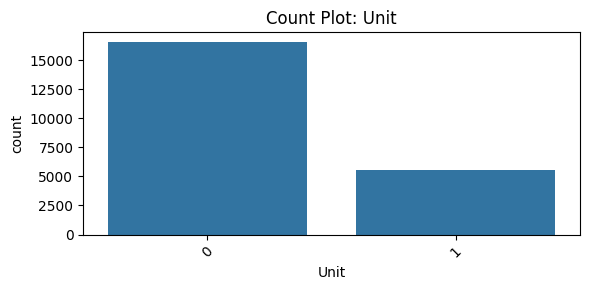

In [31]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

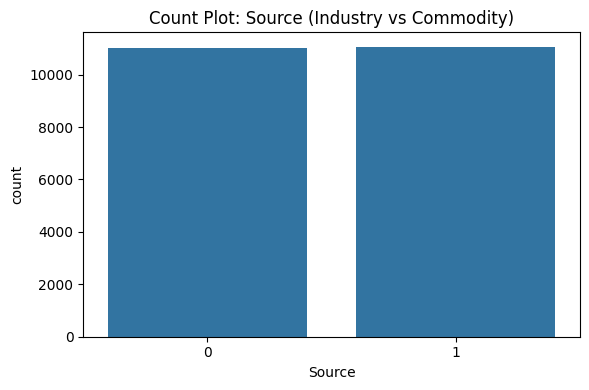

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

### Defining Target Variable and Features

In [35]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

# Normalize features

In [36]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(X)  # one-hot encode if needed
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()

Substance      Unit  Supply Chain Emission Factors without Margins  \
0  -1.341641 -0.577350                                       1.172862   
1  -0.447214 -0.577350                                      -0.313844   
2   0.447214 -0.577350                                      -0.310099   
3   1.341641  1.732051                                      -0.310099   
4  -1.341641 -0.577350                                       2.150269   

   DQ ReliabilityScore of Factors without Margins  \
0                                        1.384961   
1                                        1.384961   
2                                        1.384961   
3                                       -0.616515   
4                                        1.384961   

   DQ TemporalCorrelation of Factors without Margins  \
0                                           0.866025   
1                                           0.866025   
2                                           0.866025   
3                                           0.866025   
4                                           0.866025   

   DQ GeographicalCorrelation of Factors without Margins  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   DQ TechnologicalCorrelation of Factors without Margins  \
0                                           1.204499        
1                                          -1.437195        
2                                           1.204499        
3                                           0.323934        
4                                           1.204499        

   DQ DataCollection of Factors without Margins    Source  \
0                                           0.0 -1.001268   
1                                           0.0 -1.001268   
2                                           0.0 -1.001268   
3                                           0.0 -1.001268   
4                                           0.0 -1.001268   

   Margins of Supply Chain Emission Factors_0.0  ...  \
0                                     -1.945755  ...   
1                                     -1.945755  ...   
2                                      0.513939  ...   
3                                      0.513939  ...   
4                                     -1.945755  ...   

   Margins of Supply Chain Emission Factors_1.872  \
0                                       -0.006728   
1                                       -0.006728   
2                                       -0.006728   
3                                       -0.006728   
4                                       -0.006728   

   Margins of Supply Chain Emission Factors_1.901  \
0                                       -0.006728   
1                                       -0.006728   
2                                       -0.006728   
3                                       -0.006728   
4                                       -0.006728   

   Margins of Supply Chain Emission Factors_2.853  \
0                                       -0.006728   
1                                       -0.006728   
2                                       -0.006728   
3                                       -0.006728   
4                                       -0.006728   

   Margins of Supply Chain Emission Factors_2.865  \
0                                       -0.006728   
1                                       -0.006728   
2                                       -0.006728   
3                                       -0.006728   
4                                       -0.006728   

   Margins of Supply Chain Emission Factors_3.014  \
0                                       -0.006728   
1                                       -0.006728   
2                                       -

In [ ]:
df.to_csv("cleaned_dataset.csv", index=False)

## Applying Regression algorithms

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, PoissonRegressor, TweedieRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

In [43]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    HuberRegressor(max_iter=10000),
    PoissonRegressor(),
    TweedieRegressor(power=1, alpha=0.5),
    SVR(),
    LinearSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    BaggingRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    HistGradientBoostingRegressor(random_state=42),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=1000, random_state=42),
    XGBRegressor(random_state=42),
    CatBoostRegressor(verbose=0, random_state=42),
    LGBMRegressor(random_state=42)
]

In [41]:
model_names = [
    "LinearRegression", "Ridge", "Lasso", "ElasticNet", "BayesianRidge", "HuberRegressor",
    "PoissonRegressor", "TweedieRegressor", "SVR", "LinearSVR", "DecisionTreeRegressor",
    "RandomForestRegressor", "GradientBoostingRegressor", "AdaBoostRegressor", "BaggingRegressor",
    "ExtraTreesRegressor", "HistGradientBoostingRegressor", "KNeighborsRegressor",
    "MLPRegressor", "XGBRegressor", "CatBoostRegressor", "LGBMRegressor"
]

### Seperating into training and testing data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train and evaluate

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

initial_results = []
for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} | RMSE: {rmse:.4f} | RÂ²: {r2:.4f}")
    initial_results.append({"Model": name, "R2 Score": r2, "RMSE": rmse})

initial_df = pd.DataFrame(initial_results).sort_values(by="R2 Score", ascending=False)
print("\nðŸ“Š Initial Regression Model Performance:")
print(initial_df)

LinearRegression | RMSE: 831426.6234 | RÂ²: -12306625192939.2148
Ridge | RMSE: 0.0669 | RÂ²: 0.9202
Lasso | RMSE: 0.2372 | RÂ²: -0.0015
ElasticNet | RMSE: 0.2372 | RÂ²: -0.0015
BayesianRidge | RMSE: 0.0648 | RÂ²: 0.9253
HuberRegressor | RMSE: 0.0762 | RÂ²: 0.8967
PoissonRegressor | RMSE: 0.2260 | RÂ²: 0.0903
TweedieRegressor | RMSE: 0.2159 | RÂ²: 0.1704
SVR | RMSE: 0.0920 | RÂ²: 0.8492
NuSVR | RMSE: 0.0708 | RÂ²: 0.9107
LinearSVR | RMSE: 0.0660 | RÂ²: 0.9226
DecisionTreeRegressor | RMSE: 0.0766 | RÂ²: 0.8957
RandomForestRegressor | RMSE: 0.0763 | RÂ²: 0.8963
GradientBoostingRegressor | RMSE: 0.0758 | RÂ²: 0.8978
AdaBoostRegressor | RMSE: 0.1441 | RÂ²: 0.6305
BaggingRegressor | RMSE: 0.0762 | RÂ²: 0.8966
ExtraTreesRegressor | RMSE: 0.0762 | RÂ²: 0.8966
HistGradientBoostingRegressor | RMSE: 0.0958 | RÂ²: 0.8364
KNeighborsRegressor | RMSE: 0.0949 | RÂ²: 0.8398
GaussianProcessRegressor | RMSE: 0.2274 | RÂ²: 0.0797
MLPRegressor | RMSE: 0.0601 | RÂ²: 0.9357
XGBRegressor | RMSE: 0.0742 | RÂ²:

### Selecting Best Model

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

top_model_name = results_df.iloc[0]["Model"]
print("\nBest Model by RÂ²:", top_model_name)

model_dict = dict(zip(model_names, models))
best_model = model_dict[top_model_name]

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)


In [ ]:
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\nFinal Evaluation of Best Model ({top_model_name}): RÂ² = {r2:.4f}, RMSE = {rmse:.4f}")

# Saving model into .pkl file

In [ ]:
import pickle
with open(f"{top_model_name}_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Model saved as {top_model_name}_best_model.pkl")

# Deployment

In [ ]:
from flask import Flask, render_template, request
import pickle
import numpy as np

app = Flask(__name__)

# Load the best model
with open("YourBestModelName_best_model.pkl", "rb") as f:
    model = pickle.load(f)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get form inputs
        input_features = [float(request.form[key]) for key in request.form]
        input_array = np.array(input_features).reshape(1, -1)
        
        # Predict
        prediction = model.predict(input_array)[0]
        return render_template('index.html', prediction_text=f"Predicted value: {prediction:.2f}")
    
    except Exception as e:
        return render_template('index.html', prediction_text=f"Error: {str(e)}")

if __name__ == "__main__":
    app.run(debug=True)
